<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/uslouisianacancerdone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np

pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [ ]:
uscancer_df = pd.read_csv('QM2USCancer.csv', header=None)
uscancer_df.columns = uscancer_df.iloc[8].values
uscancer_df = uscancer_df[10:]
uscancer_df = uscancer_df.reset_index(drop=True)
yakutat_index = uscancer_df[uscancer_df['County'] == 'Yakutat City and Borough, Alaska(6)'].index[0]
uscancer_df = uscancer_df.iloc[:yakutat_index + 1]
uscancer_df['County'] = uscancer_df['County'].str.replace(r'\(6\)', '', regex=True)
uscancer_df['County'] = uscancer_df['County'].str.replace(r'\(7\)', '', regex=True)
uscancer_df.head()



,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,"Union County, Florida",12125,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
1,"Traverse County, Minnesota",27155,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
2,"Polk County, Texas",48373,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
3,"Galax City, Virginia",51640,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4.0
4,"Greeley County, Nebraska",31077,Rural,653.1,519.4,812.5,N/A,N/A,N/A,21,stable,0.7,-2.3,3.6


In [ ]:
louisiana_df = uscancer_df[uscancer_df['County'].str.endswith(', Louisiana')]
louisiana_df.head()

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
25,"Iberville Parish, Louisiana",22047,Urban,586.4,551.9,622.7,N/A,N/A,N/A,228,stable,-0.6,-4.8,0.5
33,"Cameron Parish, Louisiana",22023,Urban,579.7,501.3,667.6,N/A,N/A,N/A,43,stable,0.6,-0.7,1.7
125,"St. Landry Parish, Louisiana",22097,Rural,542.3,521.3,563.9,N/A,N/A,N/A,543,rising,0.6,0.1,1.1
154,"Vermilion Parish, Louisiana",22113,Urban,537,512.2,562.7,N/A,N/A,N/A,373,stable,0.3,-0.4,1.0
181,"St. James Parish, Louisiana",22093,Urban,533.5,493.6,576,N/A,N/A,N/A,144,rising,0.9,0.2,1.7


In [ ]:
# Extract Louisiana counties
louisiana_df = uscancer_df[uscancer_df['County'].str.endswith(', Louisiana')]

# Remove Louisiana counties from uscancer_df
uscancer_df = uscancer_df[~uscancer_df['County'].str.endswith(', Louisiana')]

# Display the updated uscancer_df (optional)
uscancer_df.head()

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,"Union County, Florida",12125,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
1,"Traverse County, Minnesota",27155,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
2,"Polk County, Texas",48373,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
3,"Galax City, Virginia",51640,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4.0
4,"Greeley County, Nebraska",31077,Rural,653.1,519.4,812.5,N/A,N/A,N/A,21,stable,0.7,-2.3,3.6


In [ ]:
# Extract Louisiana rates
louisiana_rates = louisiana_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].astype(float)

# Extract rates for other counties, replacing 'data not available ' and '* ' with NaN and then converting to float
other_counties_rates = uscancer_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'] \
    .replace(['data not available ', r'\* '], np.nan, regex=True).astype(float) # Escaped '*' using raw string r'\* '

# Perform t-test
from scipy import stats
t_statistic, p_value = stats.ttest_ind(louisiana_rates, other_counties_rates, nan_policy='omit')

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.521014487395283
P-value: 3.6651366311638925e-08


In [ ]:
def plot_z(test_statistic):
    mu, se= 0, 1 # create two variables, a mean "mu" equal to zero, and standard deviation "se" equal to 1
    x = np.linspace(mu - 3*se, mu + 3*se, 100) # create a range of values from -3 to 3 standard deviations

    plt.plot(x, norm.pdf(x, mu, se)) # plot the normal distribution
    plt.axvline(mu-se*1.96, color='blue', linestyle='dashed', linewidth=1.5,label='µ ± 1.96σ (95% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*1.96, color='blue', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations
    plt.axvline(mu-se*2.58, color='green', linestyle='dashed', linewidth=1.5,label='µ ± 2.58σ (99% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*2.58, color='green', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations

    plt.axvline(test_statistic, color='red', linestyle='solid', linewidth=1.5,label='Test Statistic') # plot a vertical line at the test statistic


    plt.ylim(0,0.4)
    plt.legend()
    plt.title('Z Distribution') # add a title
    plt.show()

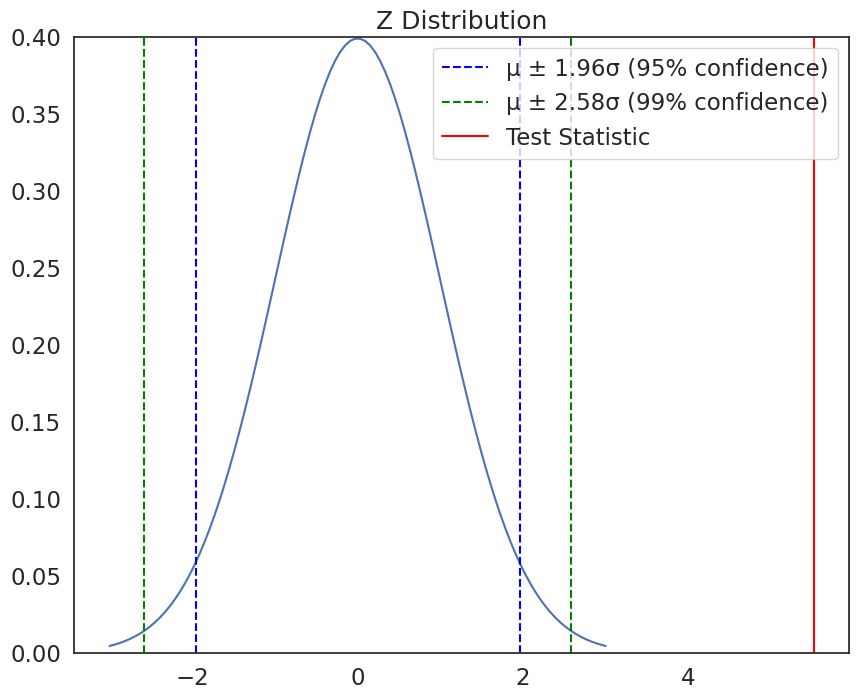

In [ ]:
plot_z(5.521014487395283)

In [ ]:

target_parishes = ['East Baton Rouge Parish, Lousiana', 'West Baton Rouge Parish, Lousiana', 'Iberville Parish, Louisiana', 'Ascension Parish, Louisiana', 'St. James Parish, Louisiana', 'St. John the Baptist Parish, Louisiana', 'St. Charles Parish, Louisiana', 'Jefferson Parish, Louisiana']

target_parishes_df = louisiana_df[louisiana_df['County'].str.contains('|'.join(target_parishes))]
other_louisiana_parishes_df = louisiana_df[~louisiana_df['County'].str.contains('|'.join(target_parishes))]


target_parishes_rates = target_parishes_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].astype(float)
other_louisiana_rates = other_louisiana_parishes_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].astype(float)

T-statistic: 0.8786382918049809
P-value: 0.38298996572497657
Z distribution for Louisiana counties- in cancer alley or not


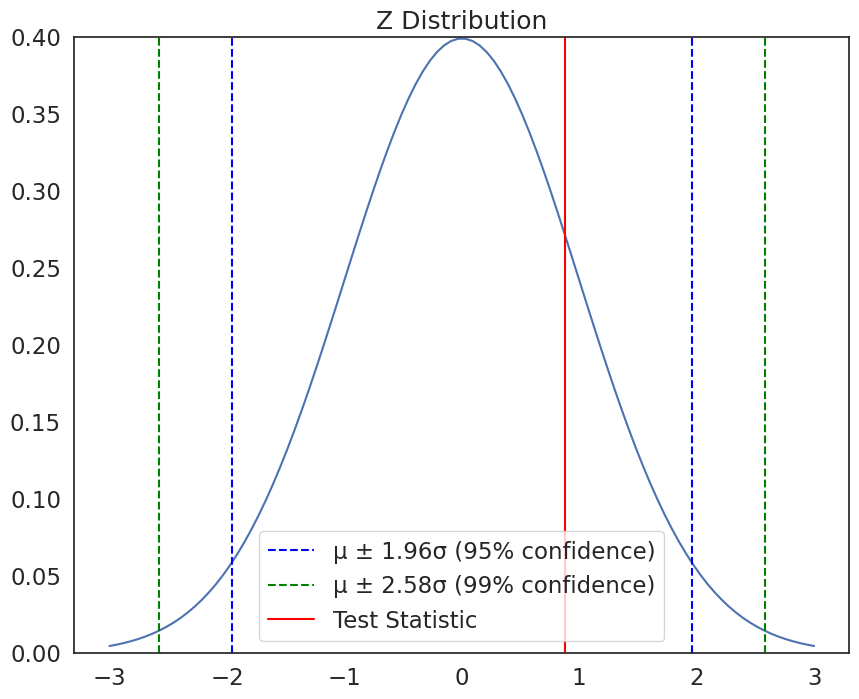

In [ ]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(target_parishes_rates, other_louisiana_rates, nan_policy='omit')


print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Z distribution for Louisiana counties- in cancer alley or not")
plot_z(0.8786382918049809)

T-statistic: 2.0986179174927257
P-value: 0.03593768412369535
distribution for Louisiana cancer-alley states vs all other US states


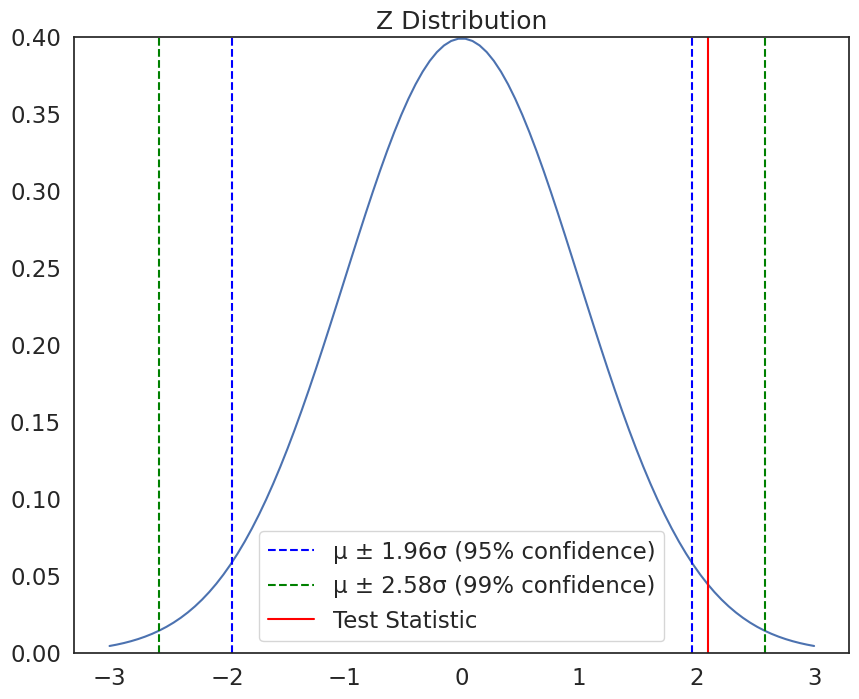

In [ ]:
other_us_parishes_df = uscancer_df[~uscancer_df['County'].str.contains('|'.join(target_parishes))]
other_us_parishes_rates = other_us_parishes_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].replace(['data not available ', r'\* '], np.nan, regex=True).astype(float)

from scipy import stats

t_statistic, p_value = stats.ttest_ind(target_parishes_rates, other_us_parishes_rates, nan_policy='omit')


print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("distribution for Louisiana cancer-alley states vs all other US states")
plot_z(2.0986179174927257)

In [ ]:
louisiana_rates = louisiana_rates.dropna()
other_counties_rates = other_counties_rates.dropna()

In [ ]:

from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(louisiana_rates, other_counties_rates, alternative='two-sided')

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 136885.5
P-value: 1.7247801420166766e-11


In [ ]:
max_value = data['Rate'].max()
filtered_data = data[data['Rate'] < max_value]

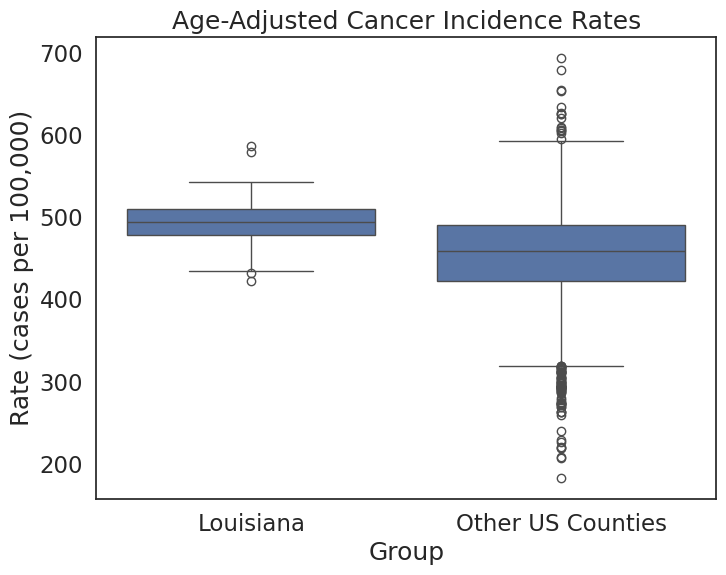

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined DataFrame for plotting
data = pd.concat([
    pd.DataFrame({'Rate': louisiana_rates, 'Group': 'Louisiana'}),
    pd.DataFrame({'Rate': other_counties_rates, 'Group': 'Other US Counties'})
])

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Rate', data=filtered_data)
plt.title('Age-Adjusted Cancer Incidence Rates')
plt.ylabel('Rate (cases per 100,000)')
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(target_parishes_rates, other_louisiana_rates, alternative='two-sided')

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 179.0
P-value: 0.9174485273104305


In [ ]:


from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(target_parishes_rates, other_us_parishes_rates, alternative='two-sided')

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: nan
P-value: nan
